# Epileptic seizure detection from EEG signals using Deep Learning
  
  

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical  # Use to_categorical instead of np_utils
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import matplotlib.pyplot as plt


#### Data Preprocessing

In [3]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
X=df.values

In [5]:
X=X[:,1:-1]


In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  # Use to_categorical instead of np_utils

y = np.array(df['y'])
Y = to_categorical(y)  # Convert labels to categorical format
print(Y.shape)  # Optional: Check the shape to confirm

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


(11500, 6)


In [8]:
print(X.shape,y.shape)

(11500, 178) (11500,)


# Intuition of the Epileptical Signal In the Dataset 

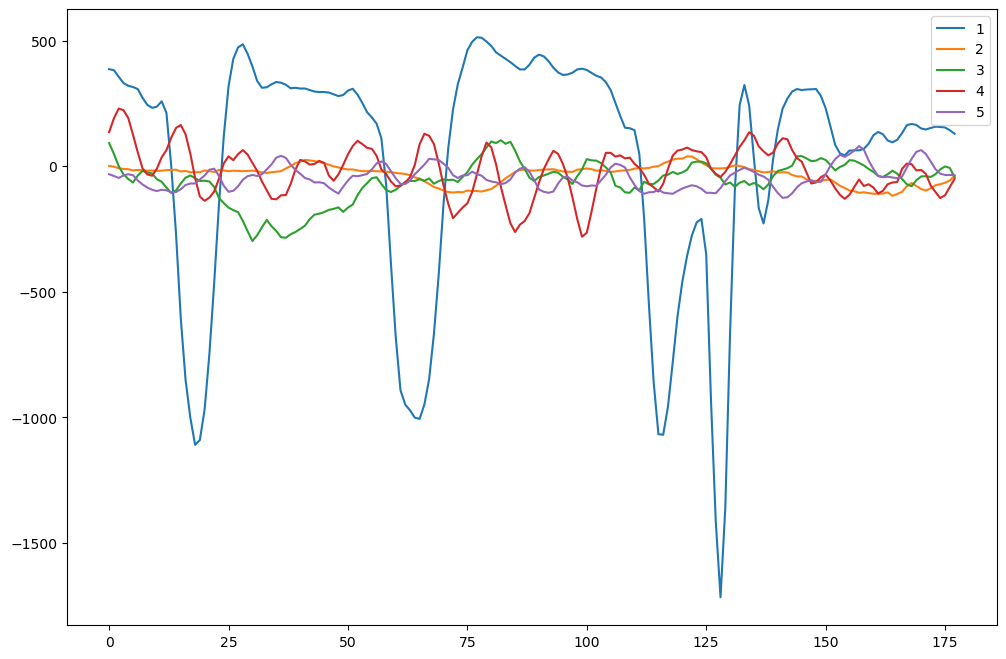

In [9]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

# Creating Artifitial Neural Net Model For the Classification 

In [10]:
model=Sequential()


model.add(Dense(256,input_shape=(45,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               11776     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


   Unnamed: 0   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]
(11500, 6)
(11500, 178) (11500,)


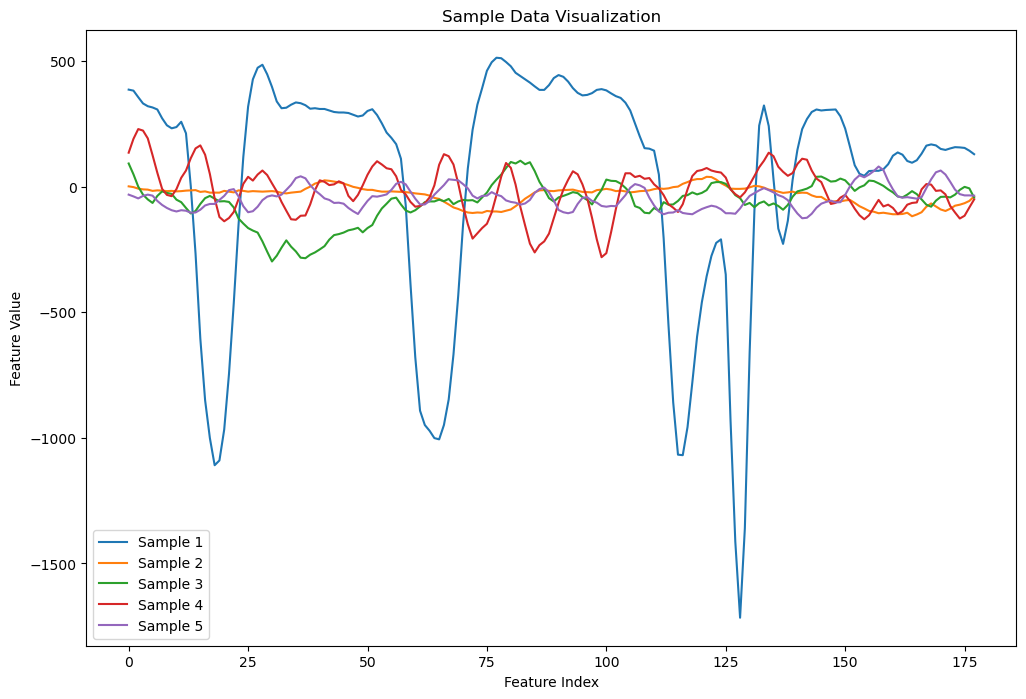

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 256)               45824     
                                                                 
 activation_33 (Activation)  (None, 256)               0         
                                                                 
 dense_34 (Dense)            (None, 128)               32896     
                                                                 
 activation_34 (Activation)  (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 128)               16512     
                                                                 
 activation_35 (Activation)  (None, 128)               0         
                                                                 
 dense_36 (Dense)            (None, 64)               

920/920 - 3s - loss: 0.0868 - accuracy: 0.9690 - val_loss: 1.1411 - val_accuracy: 0.7309 - 3s/epoch - 3ms/step
Epoch 41/100
920/920 - 3s - loss: 0.0766 - accuracy: 0.9763 - val_loss: 1.5333 - val_accuracy: 0.7013 - 3s/epoch - 3ms/step
Epoch 42/100
920/920 - 3s - loss: 0.1169 - accuracy: 0.9617 - val_loss: 1.2124 - val_accuracy: 0.7170 - 3s/epoch - 3ms/step
Epoch 43/100
920/920 - 3s - loss: 0.0906 - accuracy: 0.9693 - val_loss: 1.2350 - val_accuracy: 0.7165 - 3s/epoch - 3ms/step
Epoch 44/100
920/920 - 3s - loss: 0.0884 - accuracy: 0.9701 - val_loss: 1.2270 - val_accuracy: 0.7257 - 3s/epoch - 3ms/step
Epoch 45/100
920/920 - 3s - loss: 0.0693 - accuracy: 0.9787 - val_loss: 1.3432 - val_accuracy: 0.7174 - 3s/epoch - 3ms/step
Epoch 46/100
920/920 - 3s - loss: 0.0920 - accuracy: 0.9698 - val_loss: 1.2565 - val_accuracy: 0.7196 - 3s/epoch - 3ms/step
Epoch 47/100
920/920 - 3s - loss: 0.0788 - accuracy: 0.9760 - val_loss: 1.2307 - val_accuracy: 0.7283 - 3s/epoch - 3ms/step
Epoch 48/100
920/920 

In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset
print(df.head())

# Convert all columns to numeric, forcing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Prepare the features and labels
X = df.values[:, 1:-1]  # Assuming the first column is an index or identifier
y = np.array(df['y'])    # Assuming 'y' is the target column

# Convert labels to categorical format
Y = to_categorical(y)
print(Y.shape)  # Check the shape to confirm

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
print(X.shape, y.shape)

# Visualize some examples from the dataset
plt.figure(figsize=(12, 8))
plt.plot(X[1, :], label='Sample 1')
plt.plot(X[7, :], label='Sample 2')
plt.plot(X[12, :], label='Sample 3')
plt.plot(X[0, :], label='Sample 4')
plt.plot(X[2, :], label='Sample 5')
plt.legend()
plt.title('Sample Data Visualization')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.show()

# Build the model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],)))  # Use the number of features from X_train
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(Y.shape[1]))  # Use the number of classes for the output layer
model.add(Activation('softmax'))

# Display the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check for NaN values in the training data
if np.any(np.isnan(X_train)):
    print("NaN values found in training data.")
if np.any(np.isnan(X_test)):
    print("NaN values found in test data.")

# Normalize the data
X_train_processed = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_processed = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

# Ensure the data is of type float32
X_train_processed = X_train_processed.astype('float32')
X_test_processed = X_test_processed.astype('float32')

# Train the model
model.fit(
    X_train_processed, Y_train,
    batch_size=10,
    epochs=100,
    verbose=2,
    validation_data=(X_test_processed, Y_test)
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_processed, Y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Accuracy on Validation Set

In [20]:
# Make predictions on the test set
ypred = model.predict(X_test_processed)  # Use the processed test data

# Get the predicted class indices
yp = np.argmax(ypred, axis=1)  # Get the indices of the maximum predicted probabilities
yo = np.argmax(Y_test, axis=1)  # Get the true class indices

# Convert classes
# Assuming you want to convert classes such that class 1 is represented as 1 and all others as 0
yp_converted = np.where(yp == 0, 0, 1)  # Convert predicted classes
yo_converted = np.where(yo == 0, 0, 1)  # Convert true classes

# Print unique values for verification
print("Unique values in true classes (yo):", np.unique(yo_converted))
print("Unique values in predicted classes (yp):", np.unique(yp_converted))

# Check the shapes of the arrays
print("Shape of predicted classes:", yp_converted.shape)
print("Shape of true classes:", yo_converted.shape)

# Optionally, you can calculate accuracy or other metrics
accuracy = np.mean(yp_converted == yo_converted)
print(f'Accuracy of class 1 vs others: {accuracy:.4f}')

72/72 [==============================] - 0s 2ms/step
Unique values in true classes (yo): [1]
Unique values in predicted classes (yp): [1]
Shape of predicted classes: (2300,)
Shape of true classes: (2300,)
Accuracy of class 1 vs others: 1.0000


In [12]:
yp=np.zeros((Y_test.shape[0]))
yo=np.ones((Y_test.shape[0]))

In [13]:
for i in range(Y_test.shape[0]):
    yp[i]=np.argmax(ypred[i])+1
    yo[i]=np.argmax(Y_test[i])

In [14]:
yp.shape

(2300,)

In [15]:
yo.shape

(2300,)

In [16]:
np.unique(yo)

array([1., 2., 3., 4., 5.])

In [17]:
np.unique(Y_test)

array([0., 1.], dtype=float32)

In [18]:
np.unique(yp)

array([1., 2., 3., 4., 5.])

In [19]:
yo.shape

(2300,)

In [20]:
#conversion of classes
for i in range(Y_test.shape[0]):
    if yo[i]!=1:
        yo[i]=0
    if yp[i]!=1:
        yp[i]=0

In [21]:
np.unique(yo)

array([0., 1.])

In [22]:
np.unique(yp)

array([0., 1.])

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(yo,yp)

0.7295652173913043